<a href="https://colab.research.google.com/github/pranay-pherwani/Datathon2021/blob/main/Datathon2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install pyreadstat
import pyreadstat
import pandas as pd
import seaborn as sns
from scipy.stats import percentileofscore
from scipy import stats
import numpy as np
import random

In [9]:
#Test
random.seed(9867)

wave2, meta = pyreadstat.read_sav("/content/drive/MyDrive/Datathon2021/data/W2 Merged Data/2w-3rd_release_all/merge/Wave2_20170724.sav")
wave2.head(10)

,country,idnumber,level3,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,fgnum,q20_1,q20_2,q20_3,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,...,se10o,se11,se12a,se12b,se13,ir2,ir2a,ir2b,ir3,ir3a_1,ir3a_2,ir3a_3,ir3a_4,ir3a_5,ir3a_6,ir4,ir5,ir6,ir7,ir8,ir9_1,ir9_2,ir9_3,ir10a,ir12a,ir12b,ir12c,ir12d,ir13a,ir13b,irII13c,ir13d,ir13e,ir13f,ir13g,ir13h,ir13i,ir13k,ir14,w_all
0,1.0,11.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,12.0,14.0,98.0,2.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,...,2.0,NaN,1.0,2.0,6.0,1.0,2.0,82.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,4.0,3.0,3.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872
1,1.0,12.0,1.0,4.0,4.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,12.0,98.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,2.0,NaN,1.0,1.0,2.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,4.0,3.0,4.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,1.314
2,1.0,23.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,12.0,14.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,1.0,...,2.0,NaN,6.0,2.0,6.0,2.0,0.0,90.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,4.0,3.0,8.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872
3,1.0,100.0,1.0,2.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,2.0,98.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,...,2.0,NaN,2.0,1.0,8.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,4.0,3.0,7.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805
4,1.0,107.0,1.0,4.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,14.0,98.0,98.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,...,2.0,NaN,5.0,1.0,5.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,4.0,3.0,18.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805
5,1.0,110.0,1.0,2.0,4.0,4.0,4.0,3.0,3.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,3.0,8.0,8.0,1.0,1.0,15.0,98.0,98.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,2.0,NaN,1.0,1.0,7.0,1.0,2.0,57.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,3.0,3.0,6.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805
6,1.0,111.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,12.0,4.0,98.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,8.0,3.0,1.0,1.0,...,2.0,NaN,6.0,2.0,7.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,3.0,3.0,15.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.759
7,1.0,112.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,15.0,98.0,2.0,4.0,3.0,3.0,5.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,...,2.0,NaN,1.0,1.0,5.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,5.0,3.0,10.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.759
8,1.0,203.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,8.0,8.0,8.0,8.0,2.0,3.0,3.0,4.0,3.0,2.0,8.0,8.0,1.0,3.0,4.0,14.0,15.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,8.0,2.0,1.0,1.0,1.0,...,2.0,NaN,6.0,2.0,5.0,1.0,1.0,74.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,4.0,2.0,24.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.920
9,1.0,211.0,1.0,1.0,2.0,8.0,3.0,3.0,8.0,2.0,8.0,8.0,2.0,8.0,8.0,8.0,8.0,8.0,3.0,2.0,8.0,8.0,2.0,0.0,90.0,98.0,98.0,1.0,4.0,3.0,3.0,1.0,8.0,3.0,1.0,8.0,2.0,3.0,1.0,1.0,...,2.0,NaN,6.0,2.0,99.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,3.0,2.0,25.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.920


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
indexes = [8.15, 6.03, 7.88, 2.97, 6.60, 6.48, 7.82, 5.67, 6.41, 5.89, 2.75, 4.77, 5.98]

def to_dem_index(a):
  a = indexes[int(a-1)]
  return a


wave2['democracyIndex'] = wave2['country']
wave2['democracyIndex'] = wave2['democracyIndex'].apply(to_dem_index)
wave2.head(10)

,country,idnumber,level3,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,fgnum,q20_1,q20_2,q20_3,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,...,se11,se12a,se12b,se13,ir2,ir2a,ir2b,ir3,ir3a_1,ir3a_2,ir3a_3,ir3a_4,ir3a_5,ir3a_6,ir4,ir5,ir6,ir7,ir8,ir9_1,ir9_2,ir9_3,ir10a,ir12a,ir12b,ir12c,ir12d,ir13a,ir13b,irII13c,ir13d,ir13e,ir13f,ir13g,ir13h,ir13i,ir13k,ir14,w_all,democracyIndex
0,1.0,11.0,1.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,12.0,14.0,98.0,2.0,4.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,1.0,2.0,6.0,1.0,2.0,82.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,4.0,3.0,3.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872,8.15
1,1.0,12.0,1.0,4.0,4.0,3.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,2.0,12.0,98.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,...,NaN,1.0,1.0,2.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,4.0,3.0,4.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,1.314,8.15
2,1.0,23.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,4.0,2.0,3.0,1.0,2.0,3.0,1.0,3.0,12.0,14.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,1.0,...,NaN,6.0,2.0,6.0,2.0,0.0,90.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,4.0,3.0,8.0,2007.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,9.0,1.0,1.0,1.0,3.0,0.872,8.15
3,1.0,100.0,1.0,2.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,2.0,98.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,...,NaN,2.0,1.0,8.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,4.0,3.0,7.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805,8.15
4,1.0,107.0,1.0,4.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,3.0,1.0,1.0,14.0,98.0,98.0,1.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,...,NaN,5.0,1.0,5.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,4.0,3.0,18.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805,8.15
5,1.0,110.0,1.0,2.0,4.0,4.0,4.0,3.0,3.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,3.0,8.0,8.0,1.0,1.0,15.0,98.0,98.0,2.0,4.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,...,NaN,1.0,1.0,7.0,1.0,2.0,57.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,3.0,3.0,6.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,3.0,0.805,8.15
6,1.0,111.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,12.0,4.0,98.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,8.0,3.0,1.0,1.0,...,NaN,6.0,2.0,7.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,3.0,3.0,15.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.759,8.15
7,1.0,112.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,2.0,15.0,98.0,2.0,4.0,3.0,3.0,5.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,...,NaN,1.0,1.0,5.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,5.0,3.0,10.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.759,8.15
8,1.0,203.0,1.0,2.0,2.0,1.0,3.0,3.0,3.0,2.0,8.0,8.0,8.0,8.0,2.0,3.0,3.0,4.0,3.0,2.0,8.0,8.0,1.0,3.0,4.0,14.0,15.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,8.0,2.0,1.0,1.0,1.0,...,NaN,6.0,2.0,5.0,1.0,1.0,74.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,2.0,4.0,2.0,24.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.920,8.15
9,1.0,211.0,1.0,1.0,2.0,8.0,3.0,3.0,8.0,2.0,8.0,8.0,2.0,8.0,8.0,8.0,8.0,8.0,3.0,2.0,8.0,8.0,2.0,0.0,90.0,98.0,98.0,1.0,4.0,3.0,3.0,1.0,8.0,3.0,1.0,8.0,2.0,3.0,1.0,1.0,...,NaN,6.0,2.0,99.0,2.0,0.0,90.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,2.0,3.0,2.0,25.0,2007.0,NaN,1.0,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,5.0,0.920,8.15


In [11]:
import matplotlib.pyplot as plt
from datascience import *
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats


wave2 = wave2.drop(np.where(wave2['q98'] > 10)[0]) #https://stackoverflow.com/questions/44803007/pandas-dataframe-use-np-where-and-drop-together
wave2 = wave2.dropna(subset=['q98']) #Temporary

def toBinary(a):
  a = int(a/8)
  return a

wave2['High Belief In Democracy'] = wave2['High Belief In Democracy'] = wave2['q98'].apply(toBinary)


/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [12]:
wave2.rename(columns = {'se3a':'age', 
                    'se5a':'education',
                    'se9':'income'},
         inplace=True)
wave2 = wave2[["High Belief In Democracy","age", "education","income","democracyIndex"]]
wave2 = wave2[wave2['education'] < 90]
wave2 = wave2[wave2['age'] < 97]
wave2 = wave2[wave2['income'] < 6]

In [13]:
wave2 = wave2.dropna(subset=["age","education","income"]) #Temporary
# X_values = wave2[["age", "education","income","democracyIndex"]]
# X_values.dropna()
# X_values.head(100)
wave2.dropna()

,High Belief In Democracy,age,education,income,democracyIndex
0,1,40.0,12.0,5.0,8.15
1,1,53.0,14.0,1.0,8.15
2,1,40.0,16.0,5.0,8.15
3,1,64.0,13.0,2.0,8.15
4,1,65.0,16.0,3.0,8.15
...,...,...,...,...,...
19792,1,61.0,12.0,1.0,5.98
19793,0,25.0,15.0,2.0,5.98
19794,0,47.0,12.0,2.0,5.98
19795,1,21.0,14.0,3.0,5.98


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


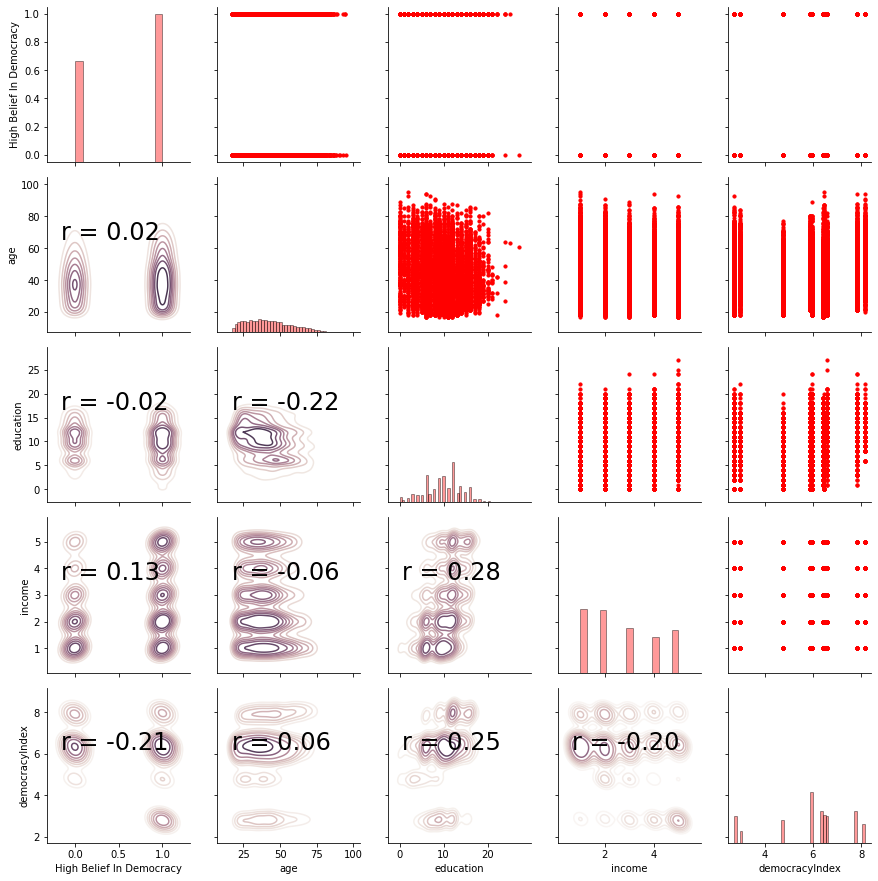

In [14]:
%matplotlib inline
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(wave2)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [ ]:
age = []
age_percentages=[]
for k in set(wave2['age']):#int(wave2['age'].max())):
  age.append(k)
  age_percentages.append(wave2.loc[(wave2['age']==k), 'High Belief In Democracy'].mean())
  
plt.bar(age,age_percentages)
plt.xlabel("Age")
plt.ylabel("Percent with High Belief in Democracy")

Text(0, 0.5, 'Percent with High Belief in Democracy')

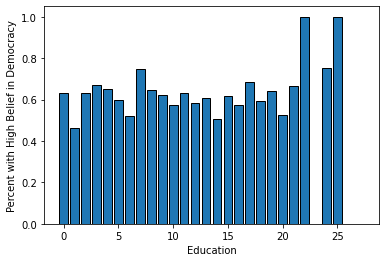

In [ ]:
education = []
education_percentages=[]
for k in set(wave2["education"]):#int(wave2['age'].max())):
  education.append(k)
  education_percentages.append(wave2.loc[(wave2['education']==k), 'High Belief In Democracy'].mean())
  
plt.bar(education,education_percentages)
plt.xlabel("Education")
plt.ylabel("Percent with High Belief in Democracy")

Text(0, 0.5, 'Percent with High Belief in Democracy')

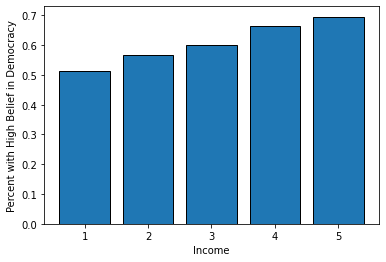

In [ ]:
income = []
income_percentages=[]
for k in set(wave2["income"]):#int(wave2['age'].max())):
  income.append(k)
  income_percentages.append(wave2.loc[(wave2['income']==k), 'High Belief In Democracy'].mean())
  
plt.bar(income,income_percentages)
plt.xlabel("Income")
plt.ylabel("Percent with High Belief in Democracy")

Text(0, 0.5, 'Percent with High Belief in Democracy')

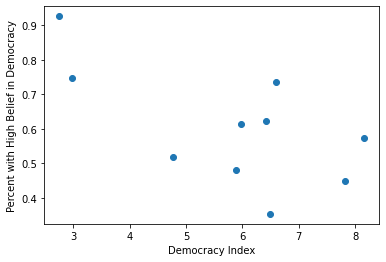

In [ ]:
democracyIndex = []
democracyIndex_percentages=[]
for k in set(wave2["democracyIndex"]):#int(wave2['age'].max())):
  democracyIndex.append(k)
  democracyIndex_percentages.append(wave2.loc[(wave2['democracyIndex']==k), 'High Belief In Democracy'].mean())
  
plt.scatter(democracyIndex,democracyIndex_percentages)
plt.xlabel("Democracy Index")
plt.ylabel("Percent with High Belief in Democracy")

In [ ]:
import pymc3 as pm

with pm.Model() as normal_model:

  family = pm.glm.families.Binomial() #Prior, will likely need to either justify or change

  wave2 = wave2.rename(columns = {"High Belief In Democracy":"HBID"}) #Avoid Spaces

  #Do we need a train/test set
  pm.GLM.from_formula("HBID ~ age + income + education + democracyIndex", data = wave2, family = family)

  normal_trace = pm.sample(draws = 2000, chains = 2, tune = 500)#Need to check what the params mean

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if sys.path[0] == '':
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [democracyIndex, education, income, age, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 342 seconds.
The acceptance probability does not match the target. It is 0.8836329998605459, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8802918811461284, but should be close to 0.8. Try to increase the number of tuning steps.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de5072ed0>,
      dtype=object)

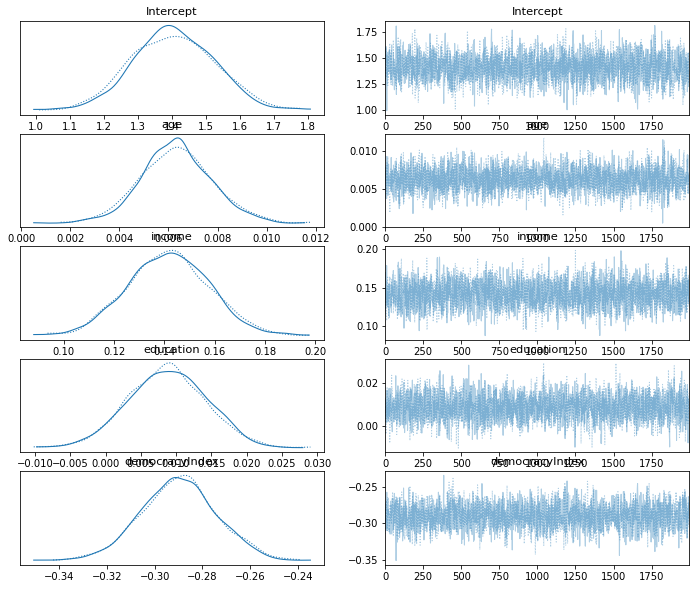

In [ ]:
pm.traceplot(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de6e85c90>,
      dtype=object)

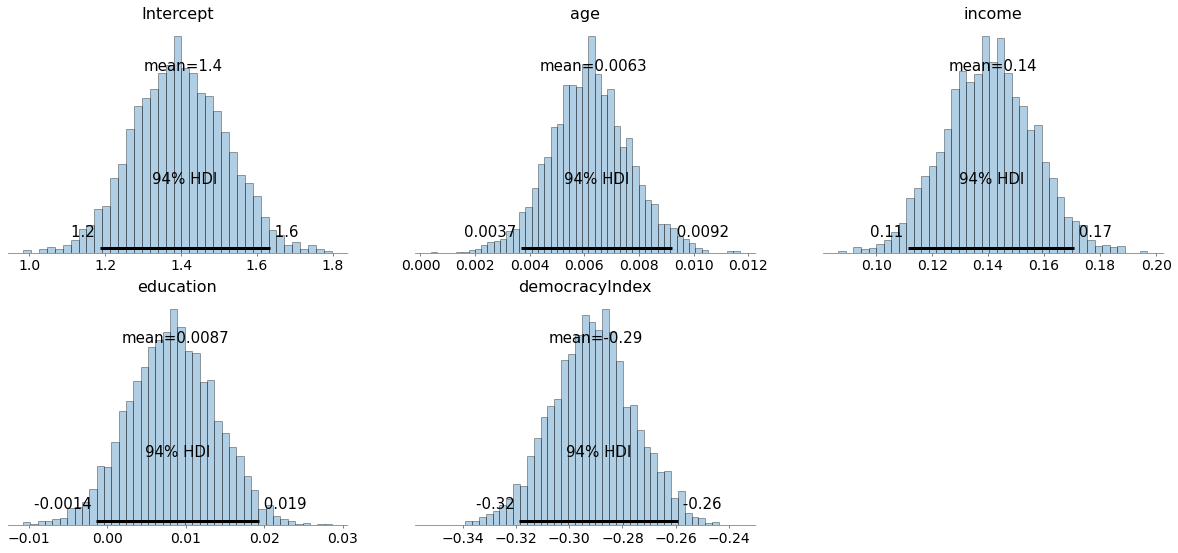

In [ ]:
pm.plot_posterior(normal_trace, kind = "hist")

In [ ]:
#Model Accuracy Check
wave2["predictedHBID"] = 1.4 + .0063*wave2['age'] + 0.14*wave2['income'] + .0087*wave2['education'] -.29*wave2['democracyIndex'] 

def getPrediction(a): # All log-odds > 0 correspond to a predicted chance above .5 of having a high belief in democracy
  if (a < 0):
    a = 0
  else:
    a = 1
  return a

wave2["predictedHBID"] = wave2["predictedHBID"].apply(getPrediction)

wave2

,HBID,age,education,income,democracyIndex,predictedHBID
0,1,40.0,12.0,5.0,8.15,1
1,1,53.0,14.0,1.0,8.15,0
2,1,40.0,16.0,5.0,8.15,1
3,1,64.0,13.0,2.0,8.15,0
4,1,65.0,16.0,3.0,8.15,1
...,...,...,...,...,...,...
19792,1,61.0,12.0,1.0,5.98,1
19793,0,25.0,15.0,2.0,5.98,1
19794,0,47.0,12.0,2.0,5.98,1
19795,1,21.0,14.0,3.0,5.98,1


In [ ]:
pd.crosstab(wave2["predictedHBID"], wave2["HBID"])

#This is barely better than always guessing 1 (60.7% vs. 59.5%)

HBID,0,1
predictedHBID,,
0,1154,1037
1,2936,4977


Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_democracyIndex, beta_income, beta_education, beta_age, beta_0]


Sampling 2 chains for 1_000 tune and 250 draw iterations (2_000 + 500 draws total) took 134 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


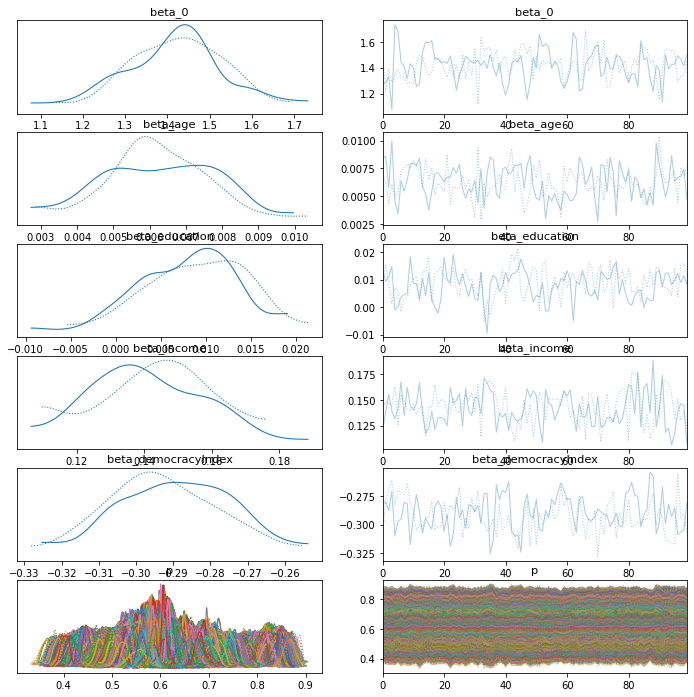

In [ ]:
lower=-10
higher=10
with pm.Model() as first_model:
    #priors on parameters
    # beta_0=pm.Uniform('beta_0', lower=lower, upper= higher)
    # beta_age=pm.Uniform('beta_age', lower, higher)
    # beta_education=pm.Uniform('beta_education', lower, higher)
    # beta_income=pm.Uniform('beta_income', lower, higher)
    # beta_democracyIndex=pm.Uniform('beta_democracyIndex', lower, higher)
    beta_0=pm.Normal('beta_0', 0, 16)
    beta_age=pm.Normal('beta_age', 0, 16)
    beta_education=pm.Normal('beta_education', 0, 16)
    beta_income=pm.Normal('beta_income', 0, 16)
    beta_democracyIndex=pm.Normal('beta_democracyIndex', 0, 16)
    
    #the probability of belonging to class 1
    p = pm.Deterministic('p', pm.math.sigmoid(beta_0+beta_age*wave2['age']+
                               beta_education*wave2['education']+
                               beta_income*wave2['income']+
                               beta_democracyIndex*wave2['democracyIndex']
                               ))
with first_model:
    #fit the data 
    observed=pm.Bernoulli("HBID", p, observed=wave2['HBID'])
    #start=pm.find_MAP()
    
    #samples from posterior distribution 
    trace=pm.sample(250)
    burned_trace=trace[150:]
    
pm.traceplot(burned_trace)
plt.show()

In [ ]:



sns.kde(trace)
plt.show()

AttributeError: ignored

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dd51d77d0>,
      dtype=object)

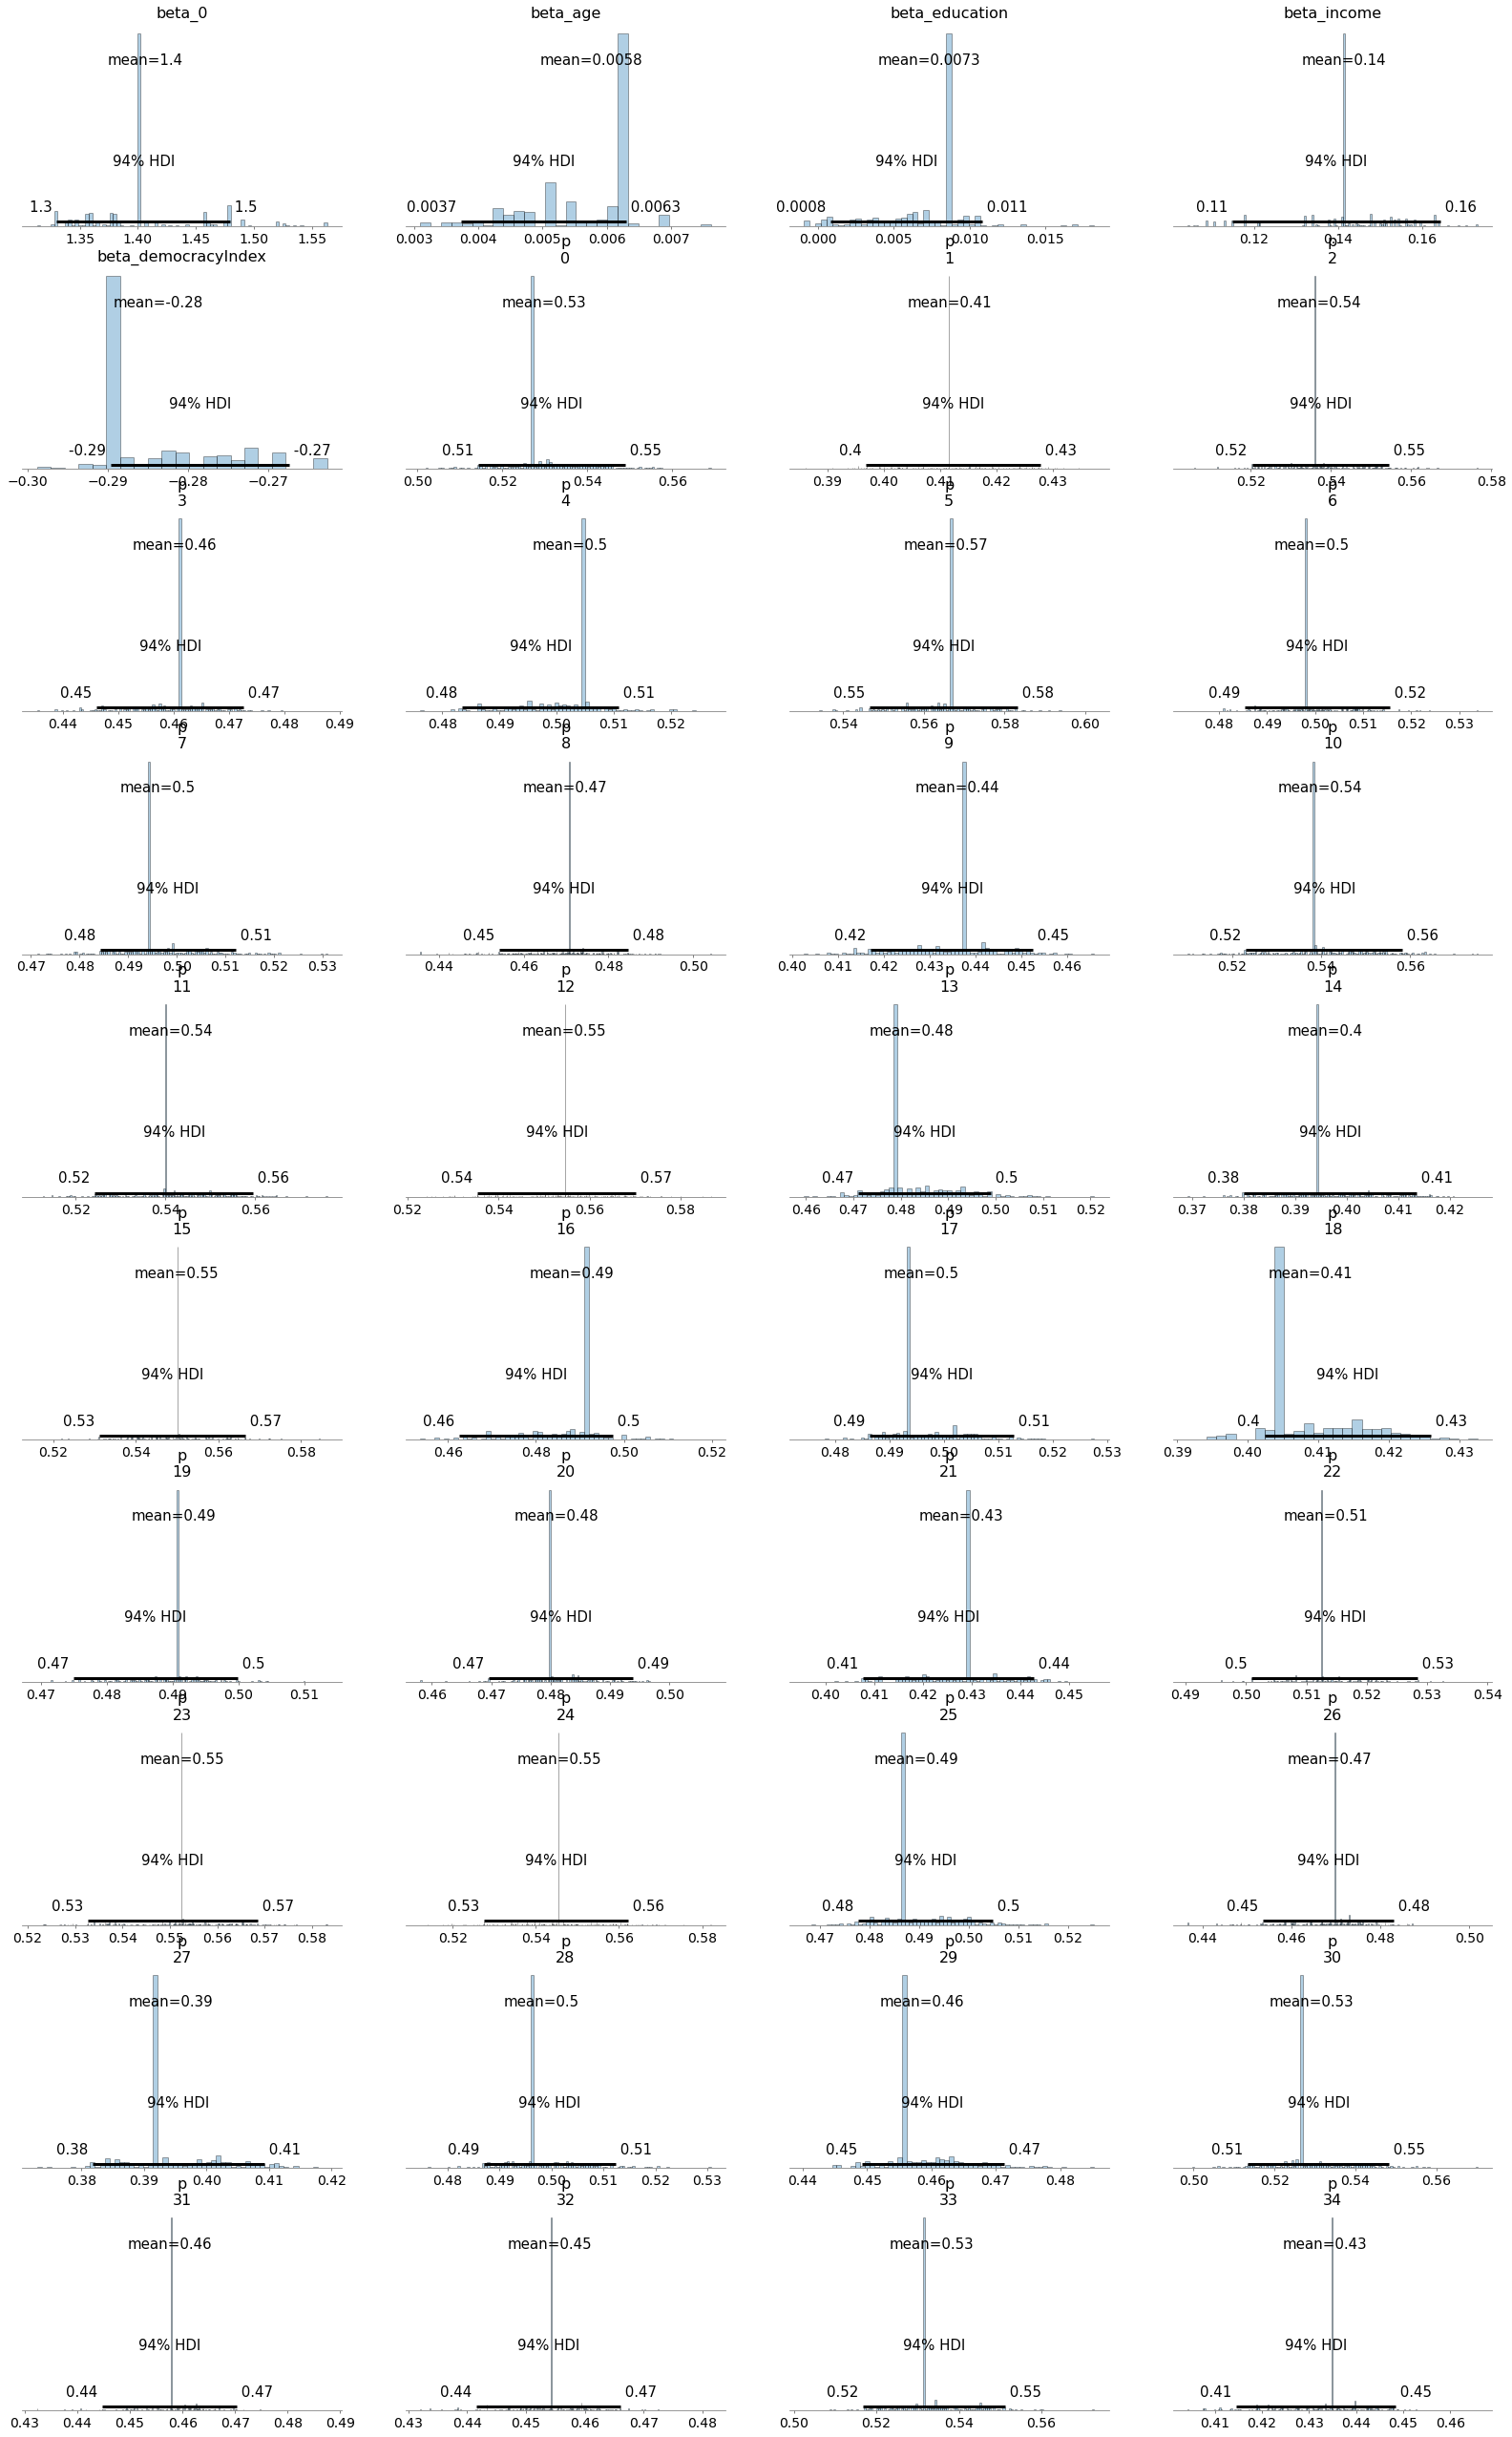

In [ ]:
pm.plot_posterior(burned_trace, kind = "hist")

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [democracyIndex, income, education, age, Intercept]


Sampling 2 chains for 100 tune and 2_500 draw iterations (200 + 5_000 draws total) took 1447 seconds.
The acceptance probability does not match the target. It is 0.9351804392392383, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9328682681057886, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


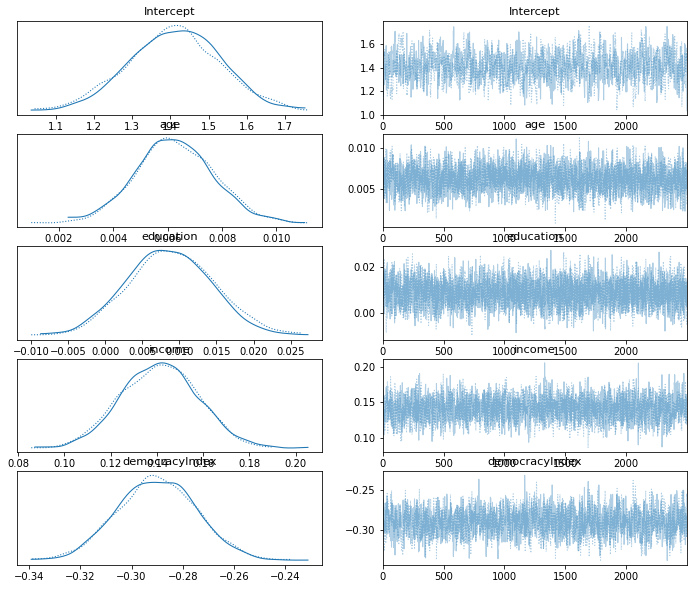

In [ ]:
with pm.Model() as automatic_model:
    pm.glm.GLM.from_formula('HBID ~ age + education + income + democracyIndex',
                            wave2,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(2500, tune=100, init='adapt_diag')
pm.traceplot(trace)
plt.show()


Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d4ac93b10>,
      dtype=object)

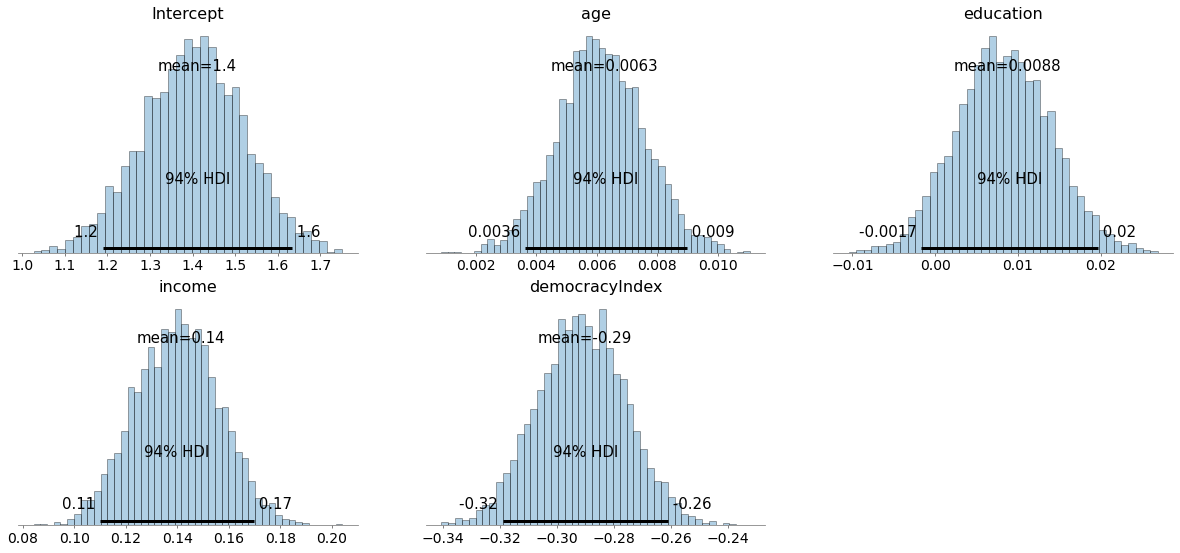

In [ ]:
pm.plot_posterior(trace, kind = "hist")

In [ ]:
#Model Accuracy Check
wave2["predictedHBID"] = 1.4 + .0063*wave2['age'] + 0.14*wave2['income'] + .0088*wave2['education'] -.29*wave2['democracyIndex'] 

def getPrediction(a): # All log-odds > 0 correspond to a predicted chance above .5 of having a high belief in democracy
  if (a < 0):
    a = 0
  else:
    a = 1
  return a

wave2["predictedHBID"] = wave2["predictedHBID"].apply(getPrediction)

pd.crosstab(wave2["predictedHBID"], wave2["HBID"])

HBID,0,1
predictedHBID,,
0,1147,1030
1,2943,4984


In [ ]:
with pm.Model() as normal_model:

  family = pm.glm.families.Binomial() #Prior, will likely need to either justify or change

  wave2 = wave2.rename(columns = {"High Belief In Democracy":"HBID"}) #Avoid Spaces

  priors = {
      "Regressor": pm.Uniform.dist(-5, 5)
  }

  #Do we need a train/test set
  pm.GLM.from_formula("HBID ~ age + income + education + democracyIndex", data = wave2, family = family, priors = priors)

  new_trace = pm.sample(draws = 2000, chains = 2, tune = 500)#Need to check what the params mean

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [democracyIndex, education, income, age, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 293 seconds.
The acceptance probability does not match the target. It is 0.9216649166771365, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1986 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8849997456083364, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d4eeefd90>,
      dtype=object)

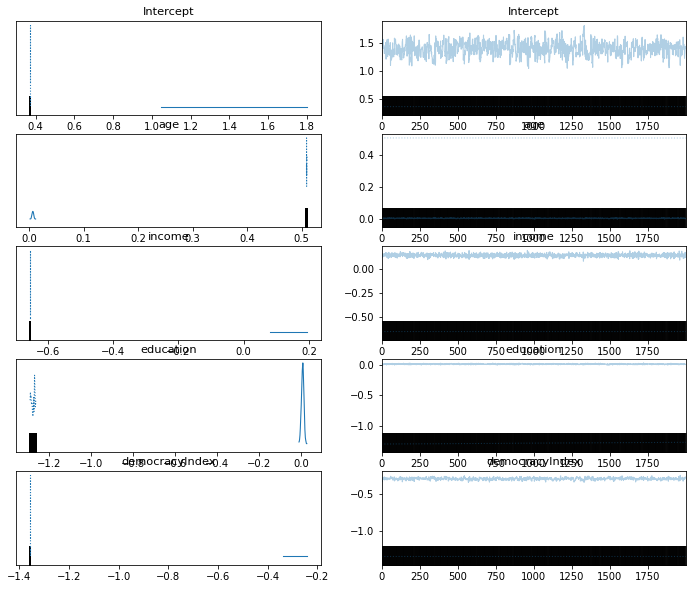

In [ ]:
pm.traceplot(new_trace)

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d4ecf2e90>,
      dtype=object)

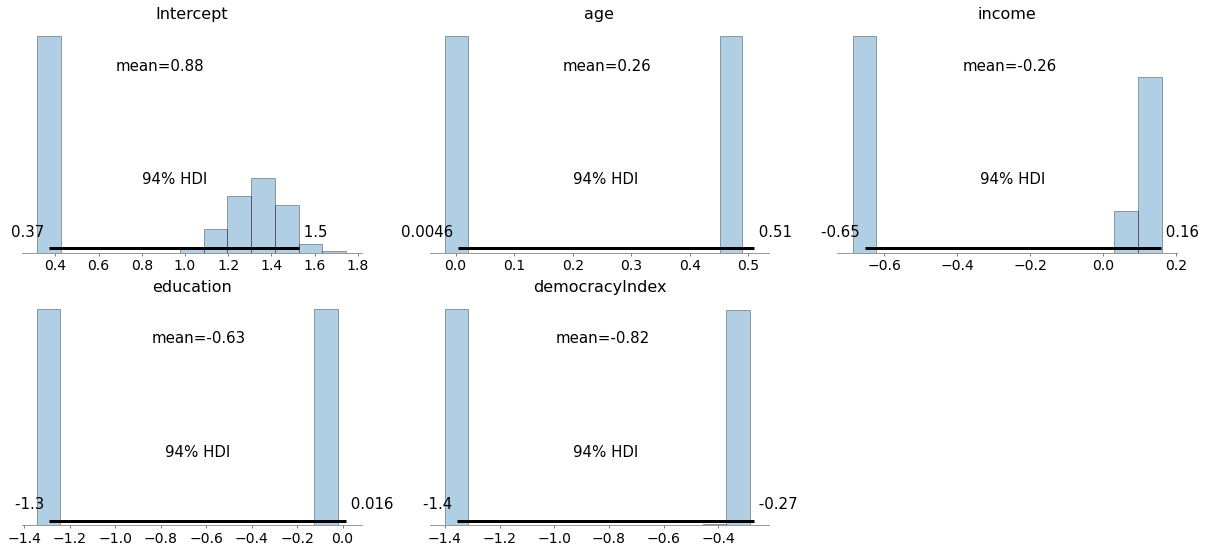

In [ ]:
pm.plot_posterior(new_trace, kind = "hist")

In [ ]:
#Model Accuracy Check
wave2["predictedHBID"] = .88 + .26*wave2['age'] + -0.26*wave2['income'] + -.0063*wave2['education'] -.82*wave2['democracyIndex'] 

def getPrediction(a): # All log-odds > 0 correspond to a predicted chance above .5 of having a high belief in democracy
  if (a < 0):
    a = 0
  else:
    a = 1
  return a

wave2["predictedHBID"] = wave2["predictedHBID"].apply(getPrediction)

pd.crosstab(wave2["predictedHBID"], wave2["HBID"])

HBID,0,1
predictedHBID,,
0,149,199
1,3941,5815
